In [135]:
import pandas as pd
import math
df = pd.read_csv("Titanic.csv")



In [136]:
df.drop(columns = ['Cabin','Ticket'], axis =1 , inplace =True)

print(df.isnull().values.any())
print(df.isnull().sum().sum())

df = df.dropna()

#print(df.isnull().values.any())
#print(df.isnull().sum().sum())


True
179


In [137]:
#df.min()

In [138]:
#df.head()

In [139]:
#df.info()

In [140]:
# male = 1 // female = 2
#Replacing string with ints
sex = {'male': 0, 'female': 1}

df.Sex = [sex[item] for item in df.Sex]

embarked = {'C': 0, 'Q': 1, 'S': 2}

df.Embarked = [embarked[item] for item in df.Embarked]

In [141]:
df.corr()

# Sex and survived have a correlation of 0.5 
# Class and survived have a correlation of -0.3
# Fare and surived have a correlation of 0.266
# Age and survieved have a correlation of -0.0824



,PassengerId,Survived,Class,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,0.029526,-0.035609,-0.024674,0.033681,-0.082704,-0.011672,0.009655,-0.001836
Survived,0.029526,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Class,-0.035609,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,-0.024674,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,-0.109639
Age,0.033681,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.082704,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,-0.011672,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.009655,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.001836,-0.181979,0.244145,-0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


In [142]:
df.drop(columns=['Name','SibSp', 'PassengerId'], axis=1,inplace = True)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

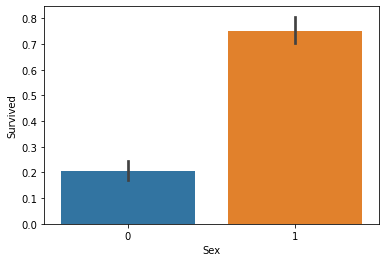

In [143]:
import seaborn as sns

sns.barplot(data = df, x = "Sex", y = "Survived")


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

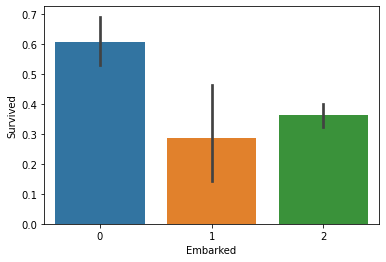

In [144]:
sns.barplot(data = df, x = "Embarked", y = "Survived")


<AxesSubplot:xlabel='Class', ylabel='Survived'>

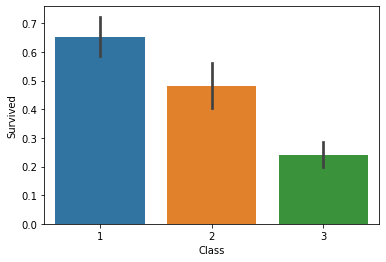

In [145]:
sns.barplot(data = df, x = "Class", y = "Survived")

In [146]:
#Scramles dataframe
#df = df.sample(frac = 1)


#Test Train Split
def testTrainSplit(data):
  length = len(df.index)
  splitLimit = int(length * 0.7)
  train = data[0: splitLimit]
  test = data[splitLimit + 1: length]
  return train, test



In [147]:
train, test = testTrainSplit(df)

In [148]:
train

,Survived,Class,Sex,Age,Parch,Fare,Embarked
0,0,3,0,22.0,0,7.2500,2
1,1,1,1,38.0,0,71.2833,0
2,1,3,1,26.0,0,7.9250,2
3,1,1,1,35.0,0,53.1000,2
4,0,3,0,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
625,0,1,0,61.0,0,32.3208,2
626,0,2,0,57.0,0,12.3500,1
627,1,1,1,21.0,0,77.9583,2
628,0,3,0,26.0,0,7.8958,2


In [149]:
test

,Survived,Class,Sex,Age,Parch,Fare,Embarked
632,1,1,0,32.0,0,30.500,0
634,0,3,1,9.0,2,27.900,2
635,1,2,1,28.0,0,13.000,2
636,0,3,0,32.0,0,7.925,2
637,0,2,0,31.0,1,26.250,2
...,...,...,...,...,...,...,...
885,0,3,1,39.0,5,29.125,1
886,0,2,0,27.0,0,13.000,2
887,1,1,1,19.0,0,30.000,2
889,1,1,0,26.0,0,30.000,0


In [161]:
def training():
    unknown = test.loc[890]
    uClass = unknown['Class']
    uFare = unknown['Fare']
    uSurvived = unknown['Survived']
    dList = []
    sDist = 0
    prevDist = 0
    
    for row in range(0, len(train.index)):
        Survived = train.iat[row, 0]
        Class = train.iat[row, 1]
        Fare = train.iat[row, 5]
        
        distance = math.sqrt(((Class - uClass) * (Class - uClass)) + ((Fare - uFare) * (Fare - uFare)) + ((Survived - uSurvived) * (Survived - uSurvived)))
        
        dList.append(distance)
        distance = prevDist
        
        if prevDist < distance:
            sDist = prevDist
        
        else:
            prevDist = distance
       
        
    return dList    
    #Just returns a list of all of the distances being compared to the 'unknown' 
        
        #dList.append(distance)


In [162]:
unknown = train.loc[356]

print(unknown['Sex'])

1.0


In [163]:
training()

[0.5,
 63.5726372654934,
 1.0151970252123477,
 45.405093326630215,
 0.3000000000000007,
 44.157815347342535,
 13.325,
 3.527990772380223,
 22.365556390128102,
 9.005692644100174,
 18.932511719262187,
 0.3000000000000007,
 23.525,
 0.10419999999999963,
 8.370334521391603,
 21.375,
 10.25,
 18.27737672643424,
 5.437140792732887,
 1.038244980724684,
 27.839944324656972,
 13.325,
 23.65864337298316,
 255.25783533517634,
 20.07069636659376,
 2.9261749776799064,
 74.44766935666959,
 44.29517468077081,
 0.3000000000000007,
 10.25,
 3.632075011615261,
 1.7249999999999996,
 13.287682265918312,
 33.85874735780992,
 1.0083117771800545,
 10.05,
 31.9375,
 0.04999999999999982,
 69.01543329314104,
 18.304712507985478,
 54.26606796737718,
 3.092329219213245,
 0.5208000000000004,
 20.049937655763422,
 39.15,
 0.5208000000000004,
 75.75140675261417,
 20.15,
 3.092329219213245,
 0.40830000000000055,
 1.0151970252123477,
 0.9124999999999996,
 2.9261749776799064,
 39.15,
 65.7576041230214,
 6.7042,
 48.75